In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [ ]:
df = pd.read_csv("/content/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heart-attack-analysis-prediction-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1226038%2F2047221%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240314%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240314T054132Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D631a49db79bd19b251f400f0b4f244f8a97a1421e7b05f6779f4026b98224b5b07e45ecc3404a382ca67f2eb273e8d8252d07f502287c3827ea501fa932703749db0e85edf3bd19f4f8985e8188151062144d6930d811bffd10fd46151a951d081ae8cbebcb39783a5caf363654d04ae069889fc7447bd09b55d644e70687ec30c970d70e771bf2fcf17e78895485aee8a78b855aefd9876fbc004713f71cf32b4ff01d0d6400316ee20fb2db0a9b6f87bc90a3b787f8b77cdbba6e133913a8f057a81529ff150a49f29597553d0b14d6805890760cada10b542016e49de250783f27d1eff305c6518bf9ef91e60dcc1723520d94016d920b9d6944cef05eb0c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4209 bytes downloaded
Downloaded and uncompressed: heart-attack-analysis-prediction-dataset
Data source import complete.


In [ ]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


In [ ]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 14)


In [ ]:
df = df.drop_duplicates()

In [ ]:
#check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


In [ ]:
# Replace the value 0 with 2 in the 'thall' column
df['thall'] = df['thall'].replace(0, 2)

In [ ]:
# Mapping for 'cp' column
cp_mapping = {0: 'typical angina',
              1: 'atypical angina',
              2: 'non-anginal pain',
              3: 'asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

# Mapping for 'slp' column
slp_mapping = {0: 'unsloping',
               1: 'flat',
               2: 'downsloping'}
df['slp'] = df['slp'].map(slp_mapping)

# Mapping for 'thall' column
thall_mapping = {1: 'fixed defect',
                 2: 'normal',
                 3: 'reversible defect'}
df['thall'] = df['thall'].map(thall_mapping)

# Mapping for 'rest_ecg' column
rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T wave abnormality',
                    2: 'left ventricular hypertrophy'}
df['restecg'] = df['restecg'].map(rest_ecg_mapping)

# Mapping for 'sex' column
sex_mapping = {1: 'male',
               0: 'female'}
df['sex'] = df['sex'].map(sex_mapping)

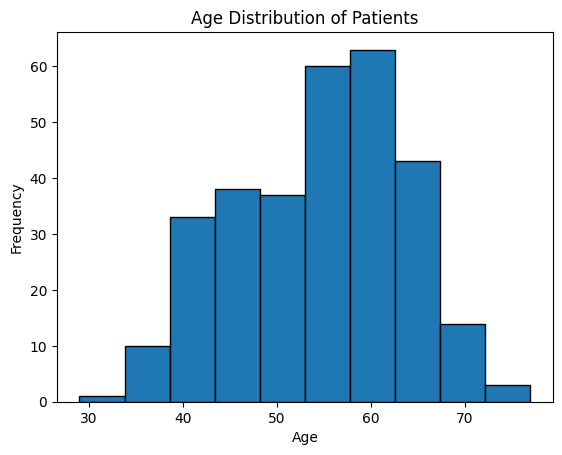

In [ ]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

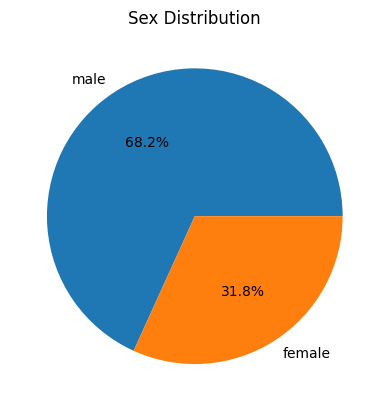

In [ ]:
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

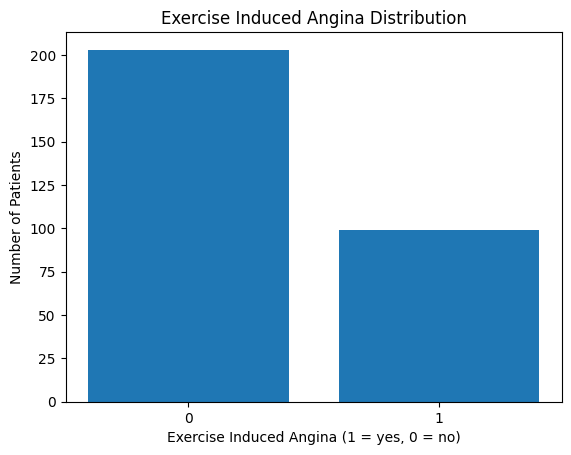

In [ ]:
exang_count = df['exng'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(exang_count.index)
plt.show()

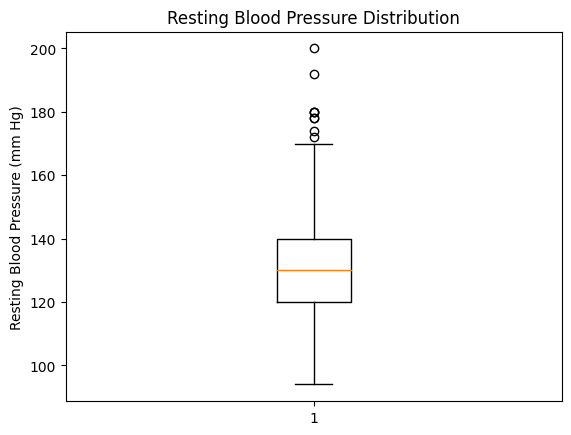

In [ ]:
plt.boxplot(df['trtbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

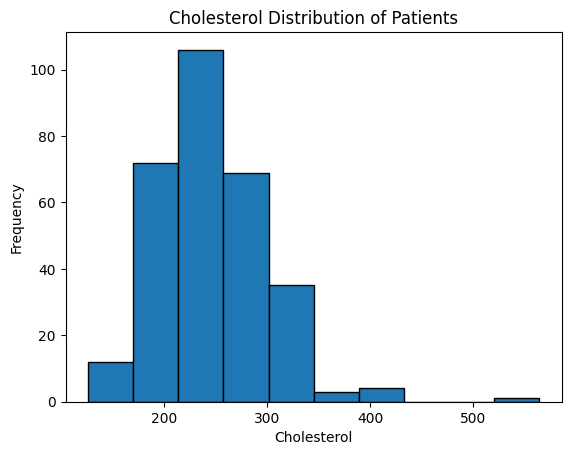

In [ ]:
plt.hist(df['chol'], bins=10, edgecolor='black')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

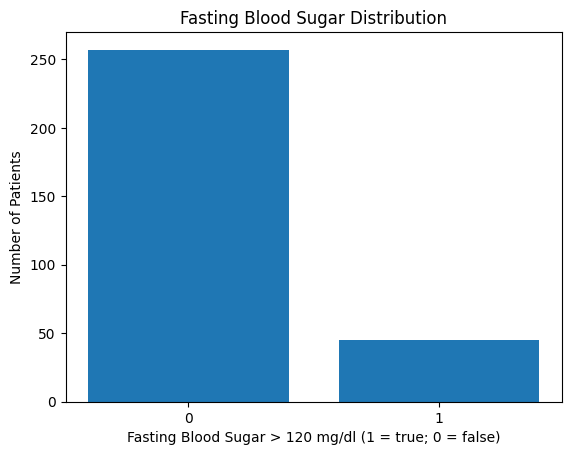

In [ ]:
fbs_count = df['fbs'].value_counts()
plt.bar(fbs_count.index, fbs_count.values)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

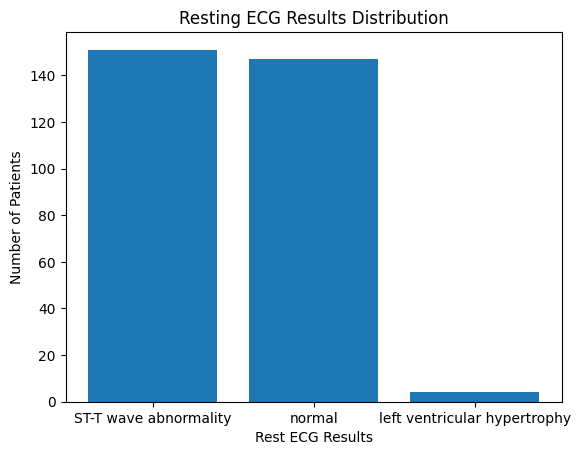

In [ ]:
rest_ecg_count = df['restecg'].value_counts()
plt.bar(rest_ecg_count.index, rest_ecg_count.values)
plt.title('Resting ECG Results Distribution')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(rest_ecg_count.index)
plt.show()

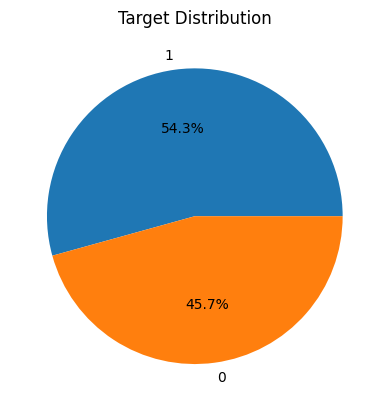

In [ ]:
target_count = df['output'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

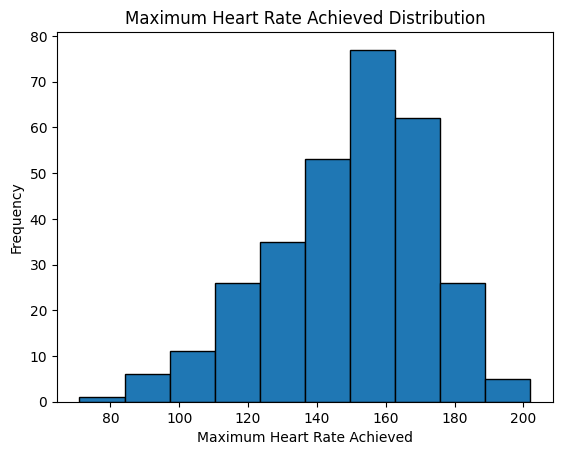

In [ ]:
plt.hist(df['thalachh'], bins=10, edgecolor='black')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

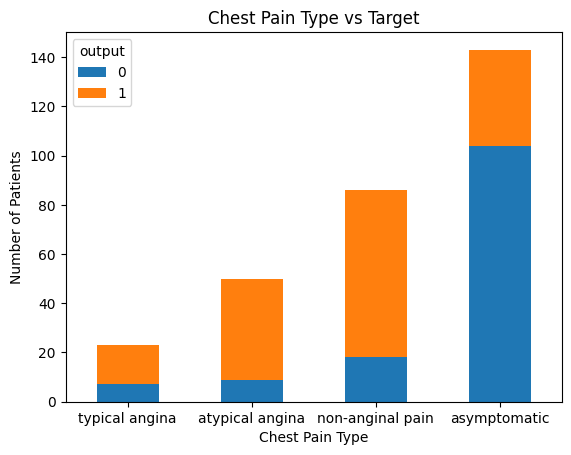

In [ ]:
cp_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
cp_target.plot(kind='bar', stacked=True)
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], rotation=0)
plt.show()

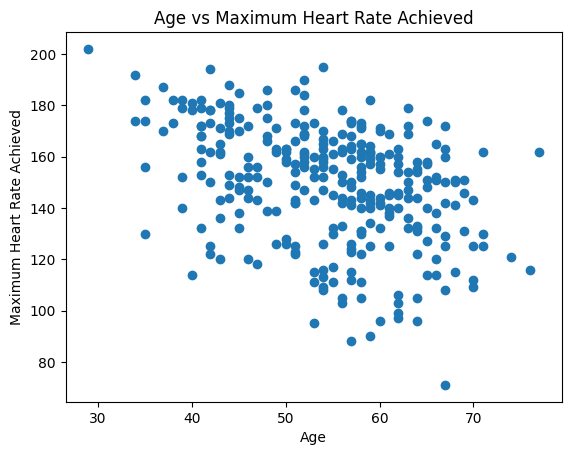

In [ ]:
plt.scatter(df['age'], df['thalachh'])
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

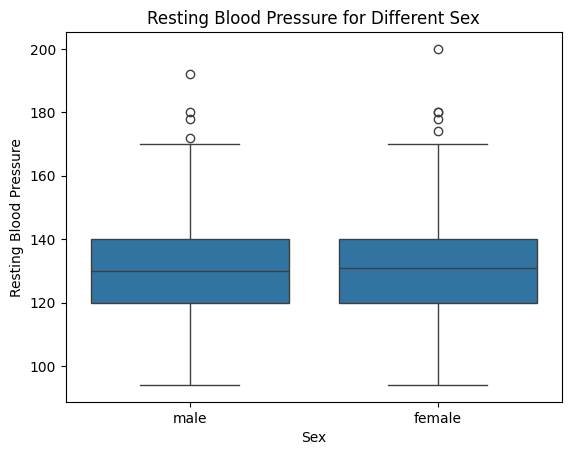

In [ ]:
sns.boxplot(x='sex', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

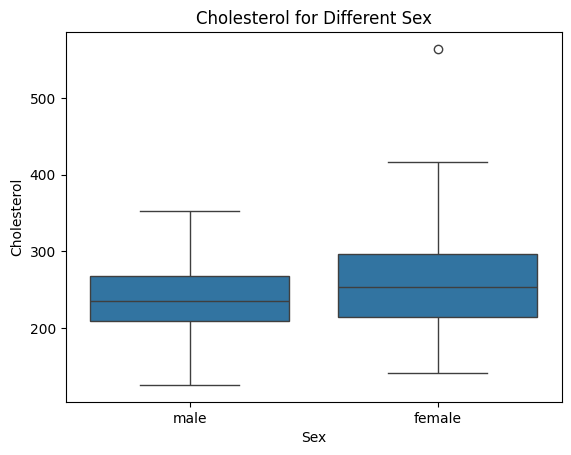

In [ ]:
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Cholesterol for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

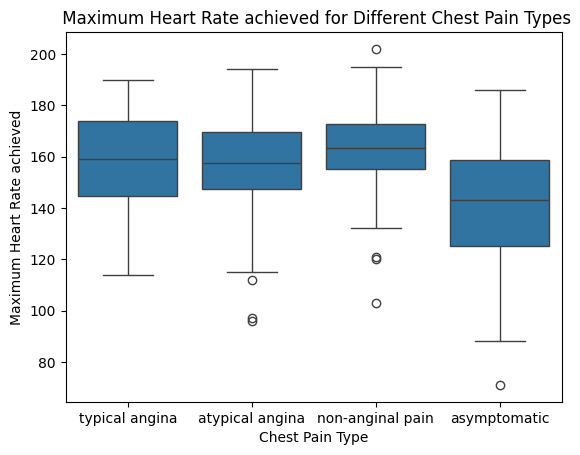

In [ ]:
sns.boxplot(x='cp', y='thalachh', data=df)
plt.title(' Maximum Heart Rate achieved for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate achieved')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


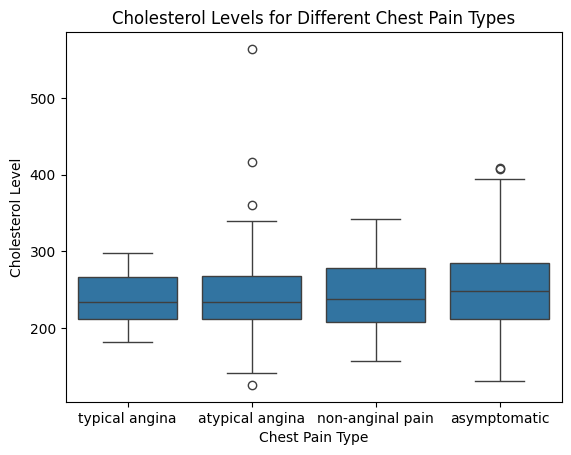

In [ ]:
sns.boxplot(x='cp', y='chol', data=df)
plt.title('Cholesterol Levels for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


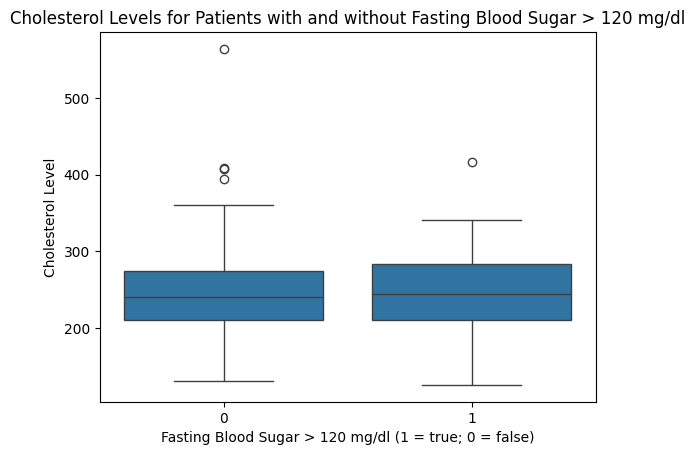

In [ ]:
sns.boxplot(x='fbs', y='chol', data=df)
plt.title('Cholesterol Levels for Patients with and without Fasting Blood Sugar > 120 mg/dl')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Cholesterol Level')
plt.show()


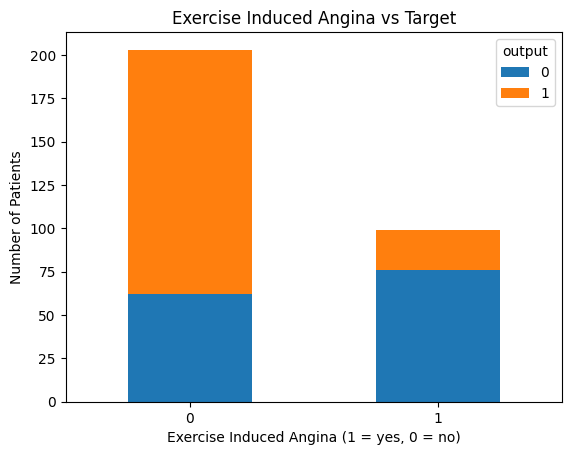

In [ ]:
exang_target = df.groupby(['exng', 'output']).size().unstack().fillna(0)
exang_target.plot(kind='bar', stacked=True)
plt.title('Exercise Induced Angina vs Target')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

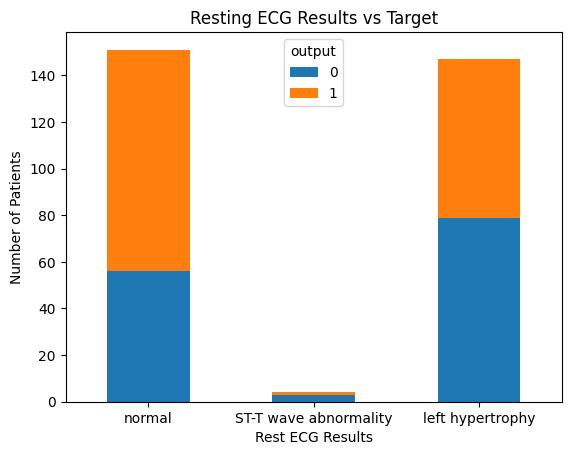

In [ ]:
restecg_target = df.groupby(['restecg', 'output']).size().unstack().fillna(0)
restecg_target.plot(kind='bar', stacked=True)
plt.title('Resting ECG Results vs Target')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2], labels=['normal', 'ST-T wave abnormality', 'left hypertrophy'], rotation=0)
plt.show()

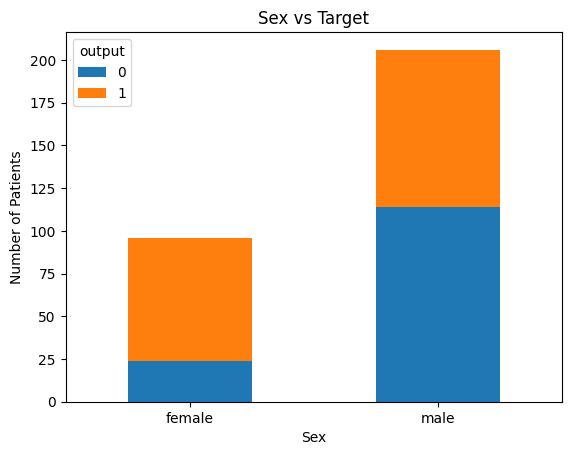

In [ ]:
sex_target = df.groupby(['sex', 'output']).size().unstack().fillna(0)
sex_target.plot(kind='bar', stacked=True)
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

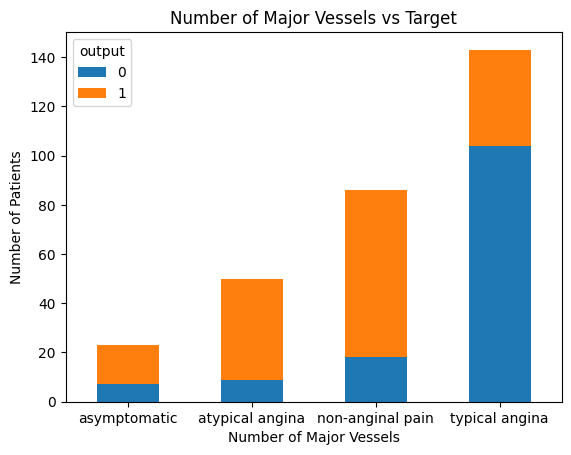

In [ ]:
ca_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
ca_target.plot(kind='bar', stacked=True)
plt.title('Number of Major Vessels vs Target')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

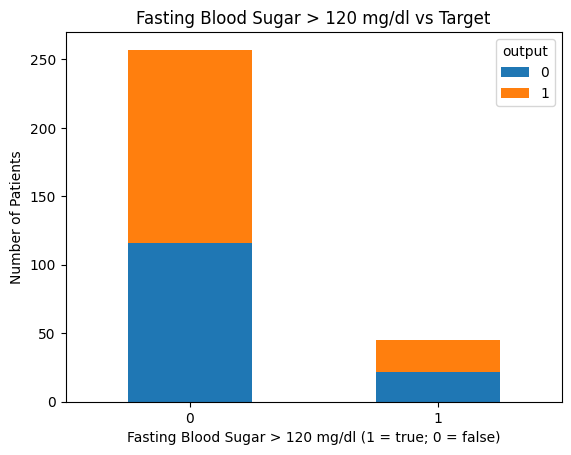

In [ ]:
fbs_target = df.groupby(['fbs', 'output']).size().unstack().fillna(0)
fbs_target.plot(kind='bar', stacked=True)
plt.title('Fasting Blood Sugar > 120 mg/dl vs Target')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

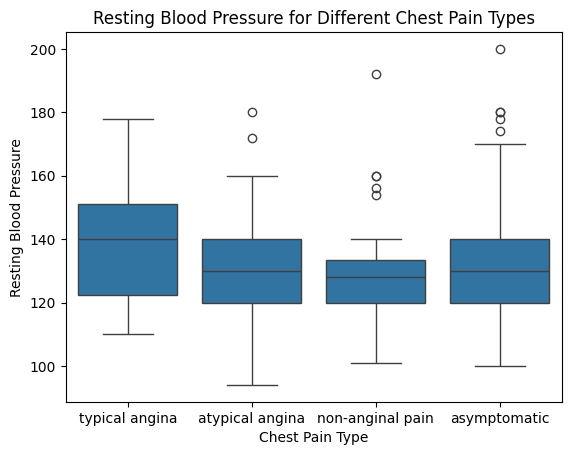

In [ ]:
sns.boxplot(x='cp', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


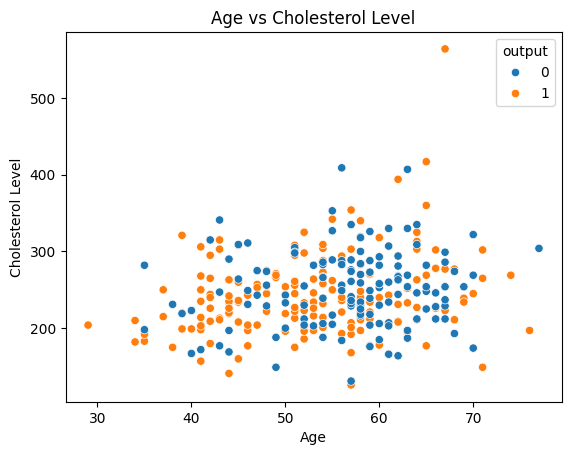

In [ ]:
sns.scatterplot(x='age', y='chol', hue='output', data=df)
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

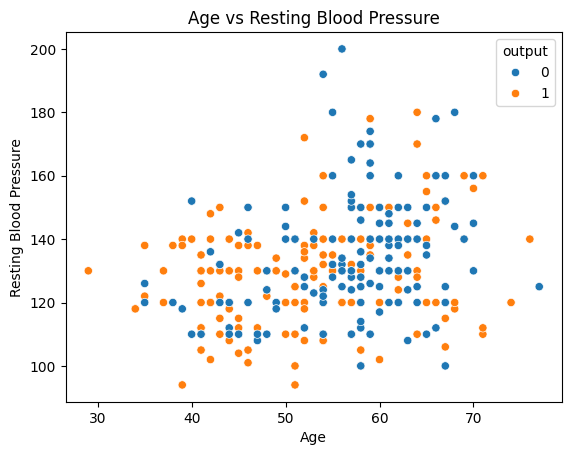

In [ ]:
sns.scatterplot(x='age', y='trtbps', hue='output', data=df)
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

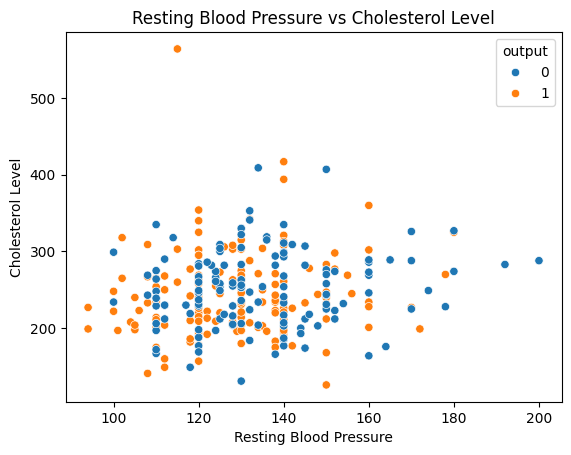

In [ ]:
sns.scatterplot(x='trtbps', y='chol', hue='output', data=df)
plt.title('Resting Blood Pressure vs Cholesterol Level')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.show()

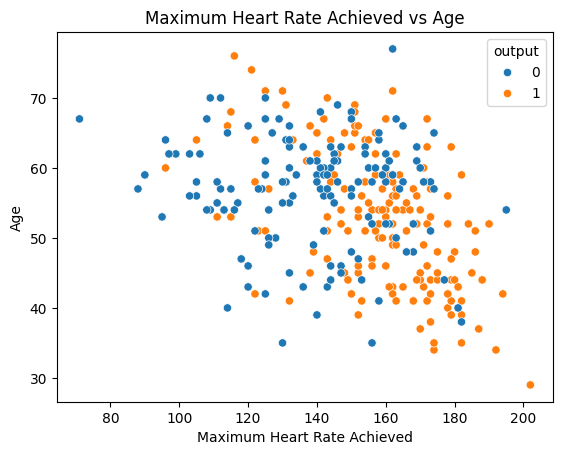

In [ ]:
sns.scatterplot(x='thalachh', y='age', hue='output', data=df)
plt.title('Maximum Heart Rate Achieved vs Age')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Age')
plt.show()

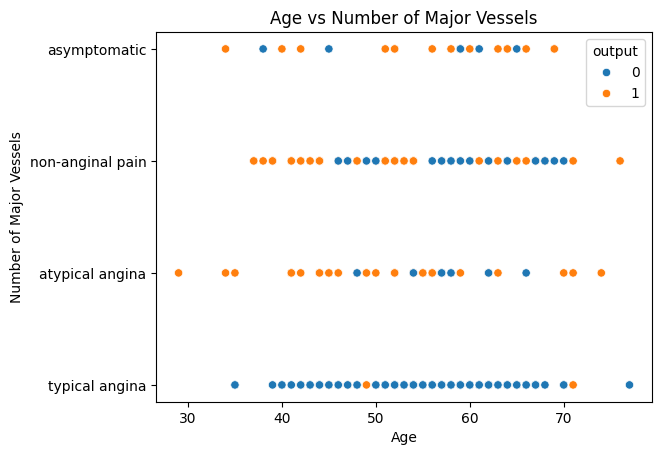

In [ ]:
sns.scatterplot(x='age', y='cp', hue='output', data=df)
plt.title('Age vs Number of Major Vessels')
plt.xlabel('Age')
plt.ylabel('Number of Major Vessels')
plt.show()

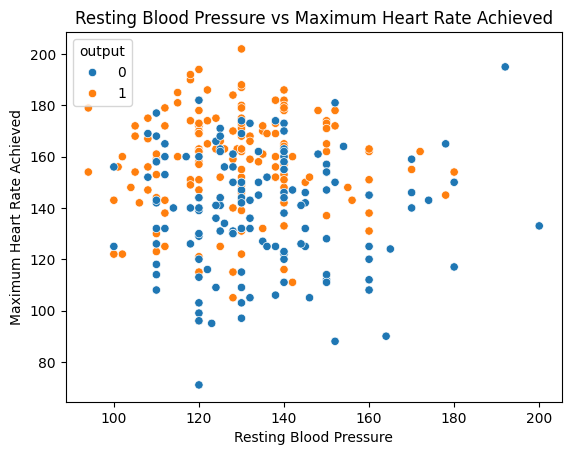

In [ ]:
sns.scatterplot(x='trtbps', y='thalachh', hue='output', data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

In [ ]:
data = df.copy()

In [ ]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa','output']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [ ]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

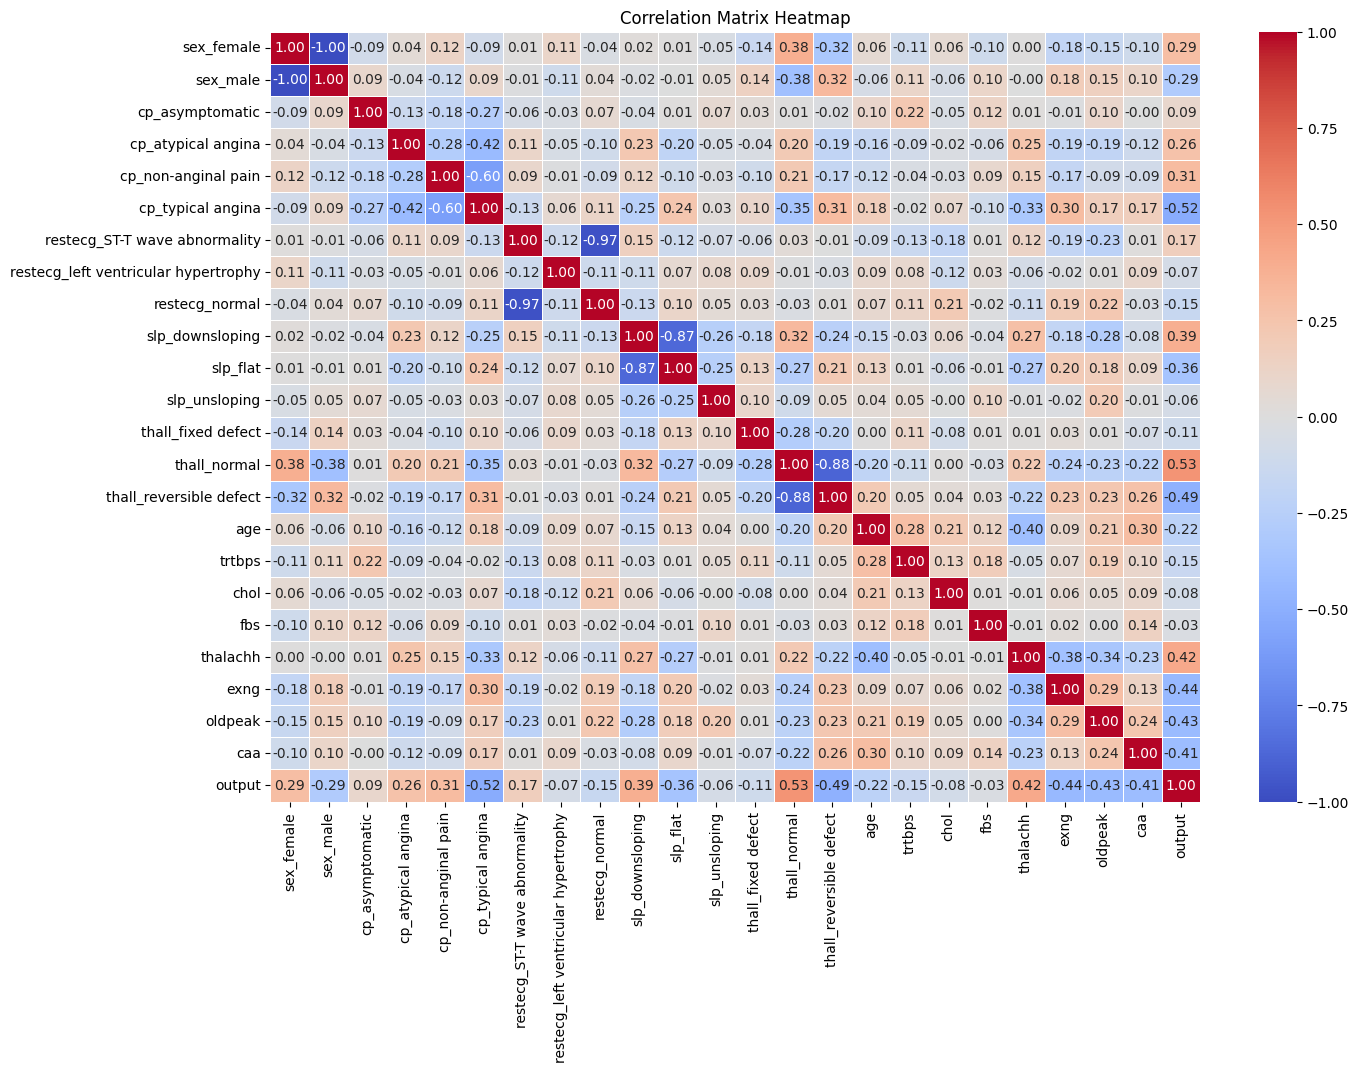

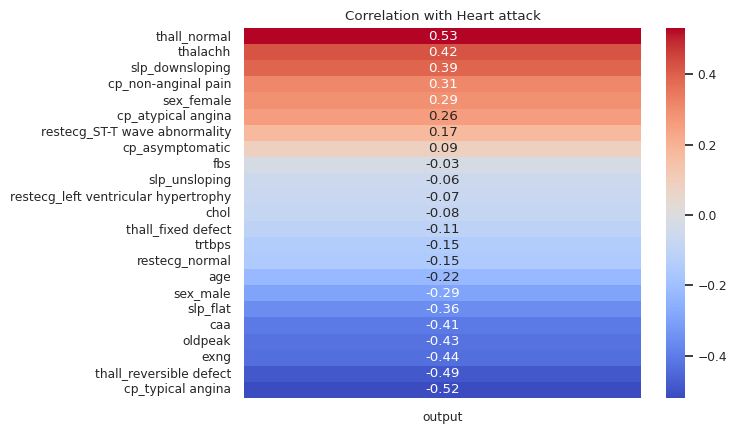

In [ ]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['output'].drop('output')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

In [ ]:
# First, handle the categorical columns
le = LabelEncoder()

for col in ['sex','cp','restecg','slp','thall']:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()

for col in ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [ ]:
# Compute t-SNE
X = df.drop('output', axis=1).values  # dropping the target column
y = df['output'].values  # the target column

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a new DataFrame for the two-dimensional t-SNE representation
df_tsne = pd.DataFrame(data = X_tsne, columns = ['Component 1', 'Component 2'])
df_tsne['Target'] = y

# Visualize with Plotly
fig = px.scatter(df_tsne, x='Component 1', y='Component 2', color='Target',
                 title='2 Component t-SNE', template='plotly')
fig.show()

In [ ]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']

In [ ]:
# Split data
X = data.drop('output', axis=1)
y = data['output']

In [ ]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# fit and transform training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc, test_preds

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

In [ ]:
model_names = ["Logistic Regression", "SVC", "Decision Trees", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes", "XGBoost"]

train_results = []
test_results = []

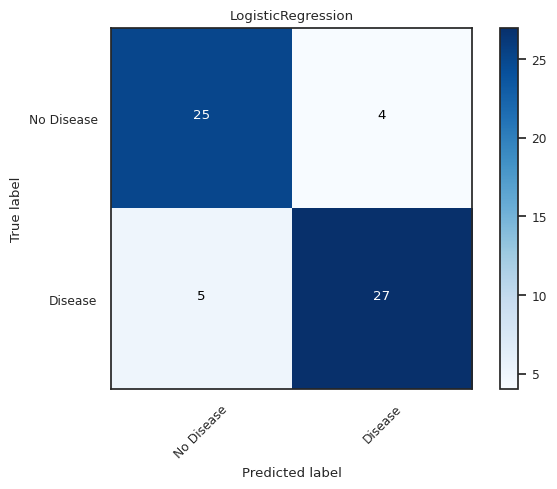

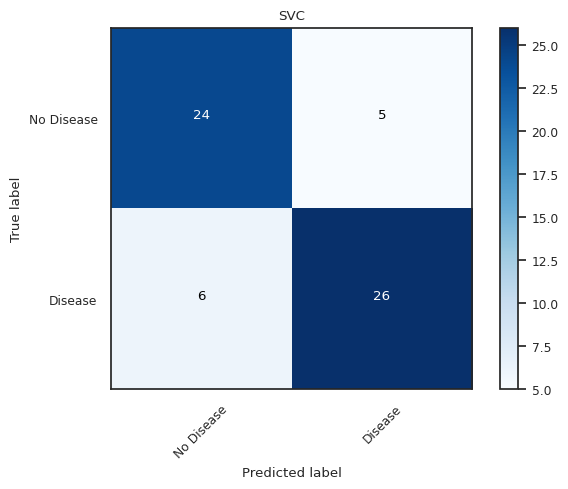

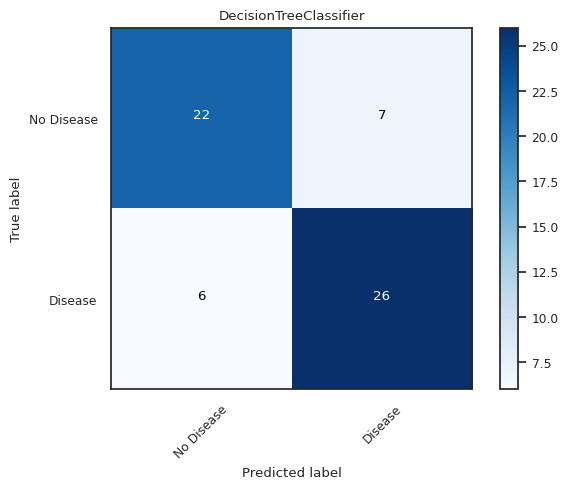

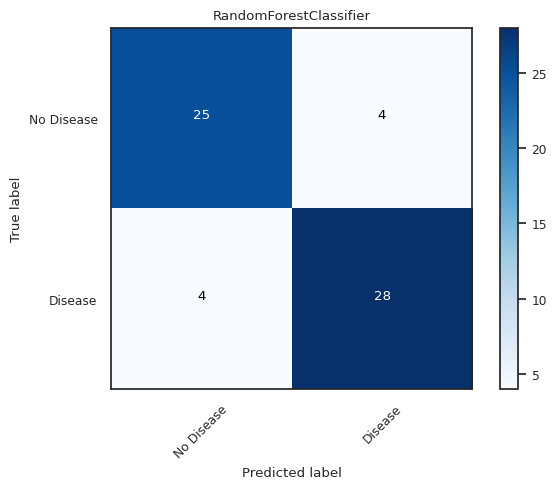

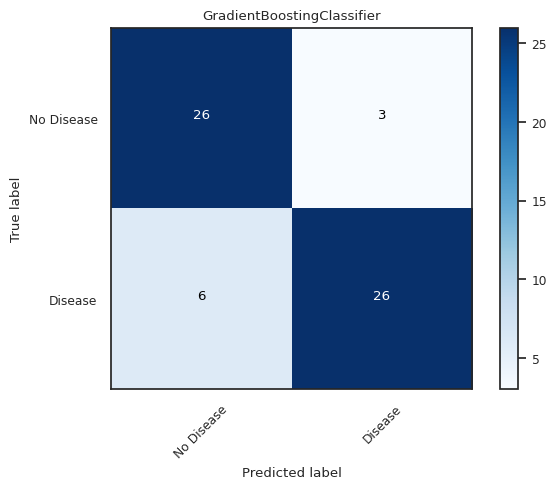

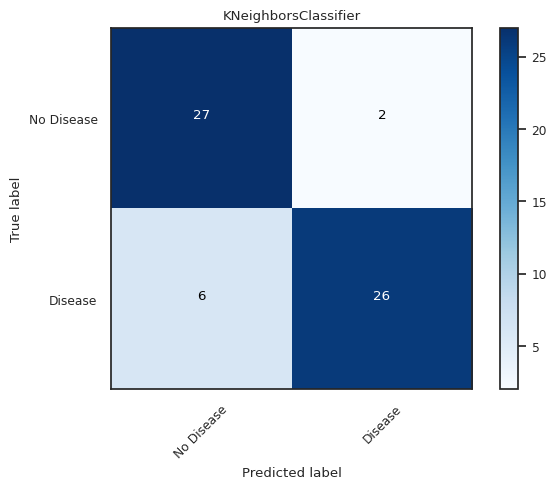

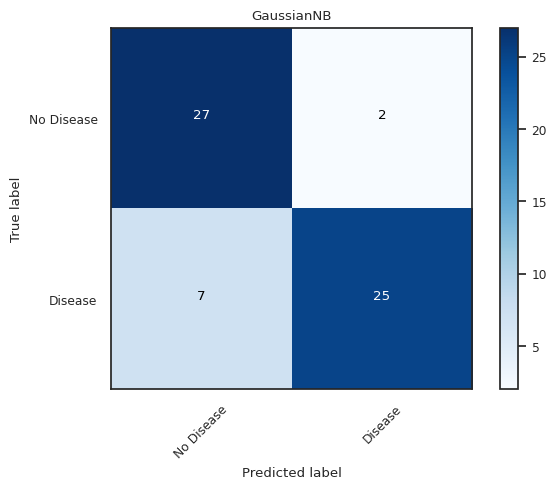

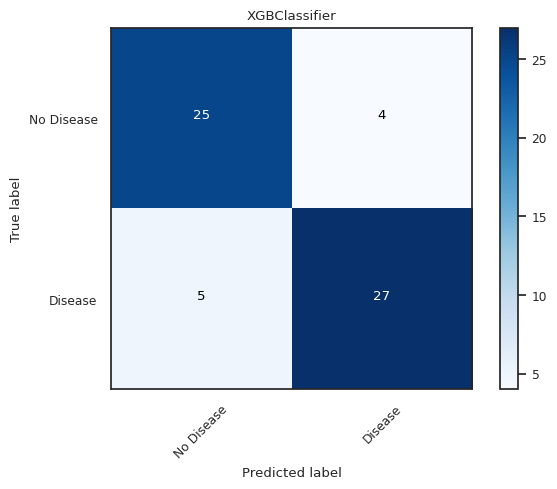

In [ ]:
for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__)
    plt.show()

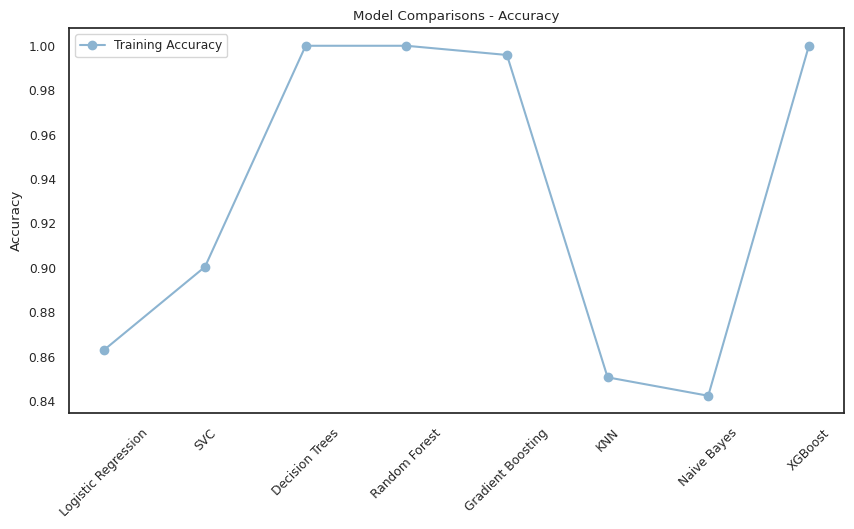

In [ ]:
# plot model performance
plt.figure(figsize=(10,5))
plt.plot(model_names, train_results, 'o-', label="Training Accuracy")
# plt.plot(model_names, test_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.show()

In [ ]:
import numpy as np
input_data = np.array([59, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)
prediction = dt_model.predict(input_data)
if prediction[0] == 1:
    print("The person is predicted to have the disease.")
else:
    print("The person is predicted to be healthy.")


The person is predicted to be healthy.


In [ ]:
import numpy as np

# Assuming you have the input data stored in a variable named input_data
input_data = np.array([59, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)

# Make predictions using the trained Decision Tree model
prediction = dt_model.predict(input_data)

# Output the prediction
if prediction[0] == 0:
    print("The person is predicted to have the disease.")
else:
    print("The person is predicted to be healthy.")

The person is predicted to have the disease.
